In [1]:
import numpy as np
import matplotlib.pyplot as plt
from xwp.spectral_1d import propTF,exact_prop

/home/sajid/miniconda3/envs/ipy3/lib/python3.7/site-packages/dask/config.py:168: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  data = yaml.load(f.read()) or {}


In [2]:
energy = 10000
wavel = (1240/energy)*10**(-9)
pi = np.pi
z = 0.075e-3
N = 2048
L_in  = 5e-6

in_domain_exact  = np.linspace(-L_in/2,L_in/2,N)
in_wave = np.zeros(N)
in_wave[int(N/2)-int(N/8):int(N/2)+int(N/8)] = 1
out_wave_exact = np.zeros((N),dtype='complex128')

In [3]:
sampling = in_domain_exact[1] - in_domain_exact[0]
critical = (wavel*z/L_in)
print(sampling>critical)
print('Fresnel Number :', (L_in**2)/(wavel*z))

True
Fresnel Number : 2688.172043010753


In [4]:
out_,L_ = propTF(in_wave,L_in/N,L_in,wavel,z)
out_domain_ = np.linspace(-L_/2,L_/2,N)

In [5]:
out_wave_exact = np.zeros((N),dtype='complex128')
exact_prop(in_wave,out_wave_exact,L_in,L_,wavel,z)

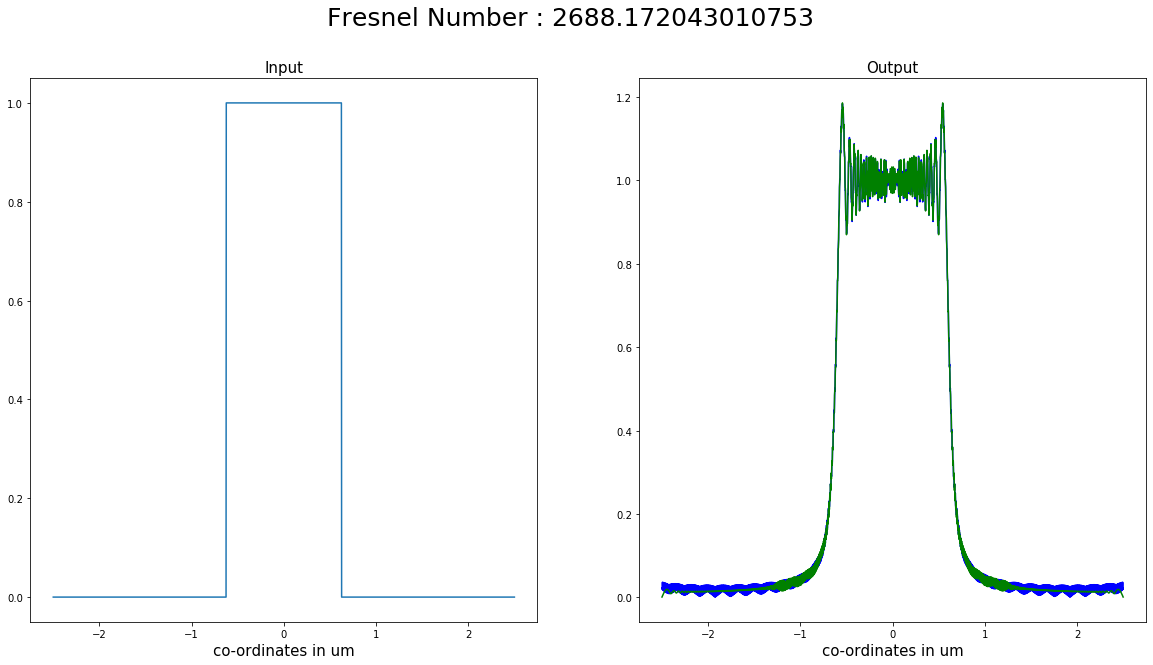

In [6]:
f, (ax1,ax2) = plt.subplots(1,2)
ax1.plot(in_domain_exact*1e6,np.abs(in_wave))
ax1.set_xlabel('co-ordinates in um',fontsize = 15)
ax1.set_title('Input', fontsize = 15)
ax2.plot(out_domain_*1e6, np.abs(out_wave_exact),'b')
ax2.plot(out_domain_*1e6, np.abs(out_),'g')
ax2.set_xlabel('co-ordinates in um',fontsize = 15)
ax2.set_title('Output', fontsize = 15)
f.set_size_inches(20, 10, forward=True)
f.suptitle('Fresnel Number : '+str((L_in**2)/(wavel*z)),fontsize = 25)
plt.show()

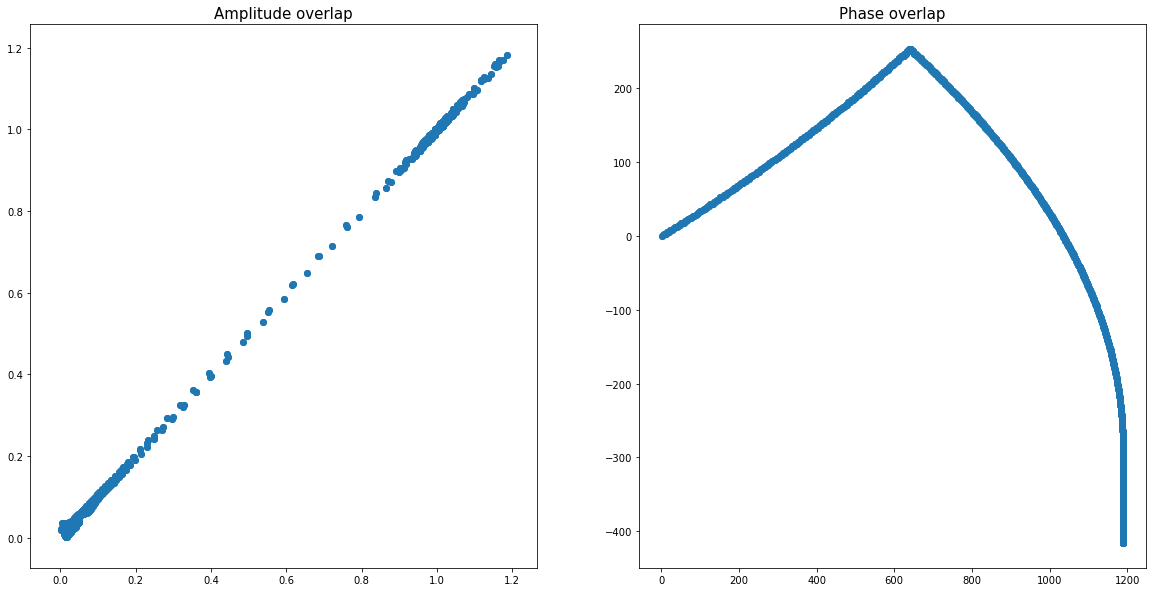

In [7]:
f, (ax1,ax2) = plt.subplots(1,2)
ax1.scatter(np.abs(out_),np.abs(out_wave_exact))
ax1.set_title('Amplitude overlap', fontsize = 15)
ax2.scatter(np.unwrap(np.angle(out_)),np.unwrap(np.angle(out_wave_exact)))
ax2.set_title('Phase overlap', fontsize = 15)
f.set_size_inches(20, 10, forward=True)
plt.show()